In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

oTrainData = pd.read_csv('/content/train.csv')
#Limpiamos espacios de columnas
#oTrainData = oTrainData.str.replace(' ', '')
#oTrainData['Age'] = pd.to_numeric(oTrainData['Age'])
#oTrainData[['PassengerId', 'Survived', 'Pclass',  'Age', 'SibSp', 'Parch',  'Fare']] = oTrainData[['PassengerId', 'Survived', 'Pclass',  'Age', 'SibSp', 'Parch',  'Fare']].apply(pd.to_numeric)
#oTrainData[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']] = oTrainData[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].astype(str)
print(oTrainData.describe())

#print( oTrainData.isnull())
oMissingValues = oTrainData.isnull().sum()
print("Valores faltantes por columna:")
print(oMissingValues)


oCleanData = oTrainData[~oTrainData['Age'].isnull()]
oCleanData.index = range(len(oCleanData))
#oCleanData['Survived'] = oCleanData['Survived'].map({'female': 1, 'male': 0})
print(oCleanData[0:6])

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass      

In [ ]:
# Crear lista con los hiper-parámetros iniciales (thetas)
fTeta0 = -5
fTeta1 = 1
iContador = 0
iN = len(oCleanData)
# Cargar el valor del learning rate (alpha)
fAlpha = 0.01
fValorBuscado = 35
print(f"Valor Buscado: {fValorBuscado}")

oH0Lambda = lambda teta0, teta1, x: teta0 + (teta1 * x)
oSigimoide = lambda teta0, teta1, x:  1 / (1 + math.exp( - oH0Lambda(fTeta0, fTeta1, x) ) )

while iContador < 50:

  # Crear función lambda para la función de hipótesis
  # Calcular el total de muestras a partir de los datos (n)
  oH0 = []
  iH0Total = 0
  for x in oCleanData["Age"]: oH0.append(oSigimoide(fTeta0, fTeta1, x) )  # Funcion Sigimoide
  iH0Total = sum(oH0)
  #print(oH0) # Nuestra lista de HTeta

  # Calcular delta para theta0 y para cada muestra
  oDelta = []
  iDeltaTotal = 0

  i = 0
  while(i < iN):

    oDelta.append( oH0[i] - oCleanData["Survived"][i]  )
    i += 1

  iDeltaTotal = sum(oDelta)

  # Calcular delta para theta1 y para cada muestra

  oDeltaX = []
  iDeltaXTotal = 0
  i = 0

  while(i < iN):
    oDeltaX.append( oDelta[i] * oCleanData["Age"][i]  )
    i += 1

  iDeltaXTotal = sum(oDeltaX)
  #print(oDeltaX)

  fTeta0 = fTeta0 - ((fAlpha/iN) * iDeltaTotal )

  # Actualizar theta1
  fTeta1 = fTeta1 - ((fAlpha/iN) * iDeltaXTotal )

  fYm = 0
  fYm = oSigimoide(fTeta0, fTeta1, fValorBuscado) #1/ (1+ math.exp( - oH0Lambda(fTeta0, fTeta1, fValorBuscado)))

  #print(f"Estimacion Teta0 Iteracion Num.{iContador}: " + str(fTeta0))
  #print(f"Estimacion Teta1 Iteracion Num.{iContador}: " + str(fTeta1))


  iContador += 1
print("Estimacion Ym: " + str(fYm))



Valor Buscado: 35
Estimacion Ym: 0.3055351842659073


In [ ]:
#fValorBuscado = 10
#fYm = oSigimoide(fTeta0, fTeta1, fValorBuscado)
#print("Estimacion Ym: " + str(fYm))

oTestData = pd.read_csv('/content/test.csv')
print(oTestData.columns)
oTestData['Age'] = oTestData['Age'].fillna(0)
#for x in oTestData["Age"]: print(oTestData["Age"]),print(oSigimoide(fTeta0, fTeta1, x) )

iContador = 0
data = []
for x in oTestData["Age"]:
  data += [{ oTestData["PassengerId"][iContador] ,round(oSigimoide(fTeta0, fTeta1, x),0) } ]

  iContador+=1
print(data)
oPrediccion = pd.DataFrame(data,columns=['PassengerId', 'Survived' ])

# pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

print(oPrediccion)

#oPrediccion.to_csv('Result.csv', sep=',', index=False, encoding='utf-8')

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
[{0.0, 892}, {1.0, 893}, {1.0, 894}, {0.0, 895}, {896, 0.0}, {0.0, 897}, {0.0, 898}, {0.0, 899}, {0.0, 900}, {0.0, 901}, {0.0, 902}, {1.0, 903}, {904, 0.0}, {905, 1.0}, {1.0, 906}, {0.0, 907}, {0.0, 908}, {0.0, 909}, {0.0, 910}, {1.0, 911}, {912, 1.0}, {0.0, 913}, {0.0, 914}, {0.0, 915}, {1.0, 916}, {1.0, 917}, {0.0, 918}, {0.0, 919}, {920, 0.0}, {0.0, 921}, {1.0, 922}, {0.0, 923}, {0.0, 924}, {0.0, 925}, {0.0, 926}, {0.0, 927}, {928, 0.0}, {0.0, 929}, {0.0, 930}, {0.0, 931}, {0.0, 932}, {0.0, 933}, {0.0, 934}, {0.0, 935}, {936, 1.0}, {0.0, 937}, {1.0, 938}, {0.0, 939}, {1.0, 940}, {0.0, 941}, {0.0, 942}, {0.0, 943}, {944, 0.0}, {0.0, 945}, {0.0, 946}, {0.0, 947}, {0.0, 948}, {0.0, 949}, {0.0, 950}, {0.0, 951}, {952, 0.0}, {0.0, 953}, {0.0, 954}, {0.0, 955}, {0.0, 956}, {0.0, 957}, {0.0, 958}, {1.0, 959}, {960, 0.0}, {961, 1.0}, {0.0, 962}, {0.0, 

### Clasificacion con dos caracteristicas usando sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPClassifier


In [ ]:
oTrainData = pd.read_csv('/content/train.csv')
# Llenar datos vacios con vecinos
data_for_imputation = oTrainData[['Pclass', 'Sex', 'SibSp', 'Parch', 'Age']].copy()
data_for_imputation['Sex'] = data_for_imputation['Sex'].map({'male': 0, 'female': 1})

imputer = KNNImputer(n_neighbors=4)

imputed_data = imputer.fit_transform(data_for_imputation)
# Convert back to DataFrame with original columns (minus 'Name')
imputed_df = pd.DataFrame(imputed_data)

# Update the 'Age' column in the original passengers DataFrame
oCleanData['Age'] = imputed_df[3]
oCleanData = oTrainData[~oTrainData['Age'].isnull()]
oCleanData["Sex"] = oCleanData["Sex"].map({'female': 1, 'male': 0})
oCleanData["Fam"] = oCleanData["SibSp"] + oCleanData["Parch"]


<ipython-input-153-d760efb5652d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oCleanData["Sex"] = oCleanData["Sex"].map({'female': 1, 'male': 0})
<ipython-input-153-d760efb5652d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oCleanData["Fam"] = oCleanData["SibSp"] + oCleanData["Parch"]


Predicciones con caracteristicas de edad y genero (regresión logistica)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(oCleanData[["Age", "Sex"]], oCleanData["Survived"], test_size=0.3)
model = LogisticRegression()
model.fit(train_x, train_y)

model.score(test_x, test_y)
predicciones = model.predict(test_x)
print("Error cuadratico promedio", mean_squared_error(test_y, predicciones))

Error cuadratico promedio 0.20930232558139536


## Predicciones con caracteristicas de edad y clase (regresión logistica)
### Mejores semillas hasta el momento
#### Parametros base edad y sexo
(1ra gen, parch usando pclass como extra)
- Separación de datos: 3747023448
- Entrenamiento: 1753702691

(2da gen, usando pclass, sibsp como extra) 0.857142
- Separación de datos: 1545205705
- Entrenamiento: 2588643803

F1 Score 0.8466257668711655


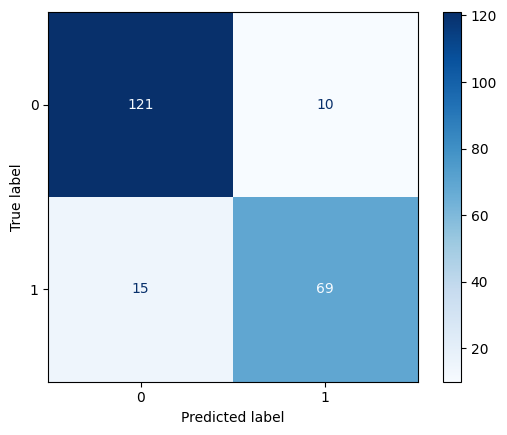

In [ ]:
#1era gen
train_x, test_x, train_y, test_y = train_test_split(oCleanData[["Age", "Sex", "Pclass"]], oCleanData["Survived"], test_size=0.3, random_state = 3747023448)
best_model = LogisticRegression(random_state = 1753702691)
best_model.fit(train_x, train_y)

best_model.score(test_x, test_y)
predicciones = best_model.predict(test_x)
print("F1 Score", f1_score(test_y, predicciones))
predicciones = best_model.predict(test_x)
cm = confusion_matrix(test_y, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

F1 Score 0.8571428571428571


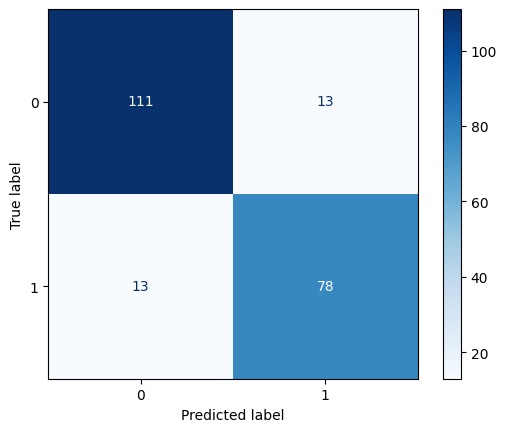

In [ ]:
#2da gen
train_x, test_x, train_y, test_y = train_test_split(oCleanData[["Age", "Sex", "Pclass", "SibSp"]], oCleanData["Survived"], test_size=0.3, random_state = 1545205705)
best_model = LogisticRegression(random_state = 2588643803)
best_model.fit(train_x, train_y)

best_model.score(test_x, test_y)
predicciones = best_model.predict(test_x)
print("F1 Score", f1_score(test_y, predicciones))
cm = confusion_matrix(test_y, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

### Análisis de los datos en los que se equivocó el modelo con la 2da gen de semillas

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(oCleanData[["Age", "Sex", "Pclass", "SibSp"]], oCleanData["Survived"], test_size=0.3, random_state = 1545205705)
best_model = LogisticRegression(random_state = 2588643803)
best_model.fit(train_x, train_y)
best_model.score(test_x, test_y)
predicciones = best_model.predict(test_x)

Cantidad de errores:  26


,Age,Sex,Pclass,SibSp,Predicciones,Survived
712,48.0,0,1,1,0,1
852,9.0,1,3,1,1,0
816,23.0,1,3,0,1,0
483,63.0,1,3,0,0,1
81,29.0,0,3,0,0,1
807,18.0,1,3,0,1,0
857,51.0,0,1,0,0,1
671,31.0,0,1,1,1,0
501,21.0,1,3,0,1,0
400,39.0,0,3,0,0,1


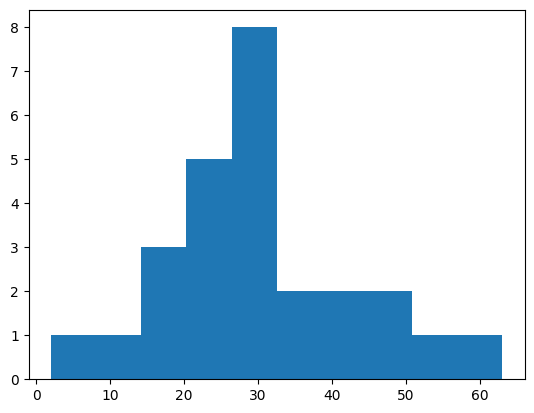

In [ ]:
test_x['Predicciones'] = predicciones
test_x['Survived'] = test_y
errors = test_x[test_x['Survived'] != test_x['Predicciones']]
print("Cantidad de errores: ", len(errors))
plt.hist(errors['Age'])
errors

## Iteraciones con semillas aleatorias para obtener el mejor modelo

In [ ]:
best_seed = None
best_score = float("-inf")
seeds = [[np.random.randint(0, 2**32 - 1), np.random.randint(0, 2**32 - 1)] for _ in range(1000)]
for seed in seeds:
  train_x, test_x, train_y, test_y = train_test_split(oCleanData[["Age", "Sex", "Pclass"]], oCleanData["Survived"], test_size=0.3, random_state=seed[0])
  model = LogisticRegression(random_state=seed[1])
  model.fit(train_x, train_y)

  model.score(test_x, test_y)
  predicciones = model.predict(test_x)
  score = f1_score(test_y, predicciones)
  if score > best_score:
    best_score = score
    best_seed = seed

print("Mejor semilla separacion", best_seed[0])
print("Mejor semilla entrenamiento", best_seed[1])
print("Mejor score", best_score)

Mejor semilla separacion 2101745991
Mejor semilla entrenamiento 281054466
Mejor score 0.8461538461538461


In [ ]:
test_data = pd.read_csv('/content/test.csv')
test_data["Sex"] = test_data["Sex"].map({'female': 1, 'male': 0})
test_data["Age"] = test_data["Age"].fillna(0)

#predicciones = best_model.predict(test_data[["Age", "Sex", "Pclass"]])
#test_data["Survived"] = predicciones
#test_data[["PassengerId", "Survived"]].to_csv("submission.csv", index=False)

### Pruebas con redes neuronales

F1 Score 0.22429906542056077


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


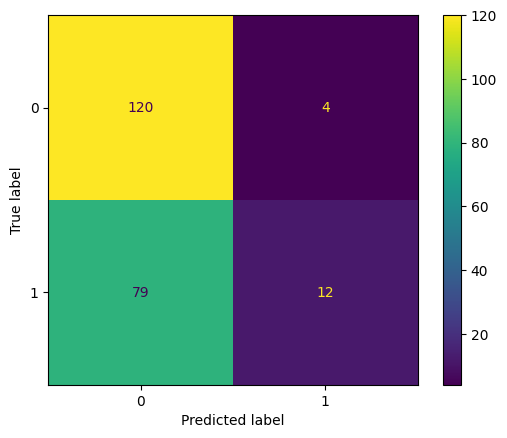

In [ ]:
nn = MLPClassifier(random_state=0, hidden_layer_sizes=(2),
                   activation="logistic", verbose = False, solver="adam",
                   learning_rate= "constant"
                   )
nn.fit(train_x, train_y)
predicciones = nn.predict(test_x)
print("F1 Score", f1_score(test_y, predicciones))
cm = confusion_matrix(test_y, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()